In [34]:
from math import sqrt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10000)

In [35]:
# S0 is the spot price
# K is the strike price
# T is the fraction of days to strike date divided by 252 (stock market days)
# r is the risk free rate
# q is the dividend yield percentage
# sigma is the annual volatility of the returns of the stock

def Black_Scholes_European(S0, K, q, T, r, sigma):
  d1 = (np.log(S0/K) + (r - q + sigma**2)*T) / sigma*sqrt(T)
  d2 = d1 - sigma*sqrt(T)

  Call_price = S0*np.exp(-q*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
  Put_price =  K*np.exp(-r*T)*norm.cdf(-d2) - S0*np.exp(-q*T)*norm.cdf(-d1)

  return Call_price, Put_price

In [36]:
def simulate_stock_prices(S0, r, q, sigma, T, M, N=1, price_paths=[]):
  dt = 1 / M*T

  mu = r - q + (sigma**2)/2

  S = np.zeros(M*T)
  S[0] = S0

  for i in range(1, M*T):
    dW = np.random.normal(0, 1) * np.sqrt(dt)
    S[i] = S[i-1] * (mu*dt + sigma*dW + 1)

  steps = np.array(list(range(M*T)))

  path = [steps, S]
  price_paths.append(path)

  if len(price_paths)==N:
    return price_paths

  else:
    return simulate_stock_prices(S0, r, q, sigma, T, M, N, price_paths)

In [37]:
def Black_Scholes_American(S0, K, q, T, r, sigma):
  M = 252 # number of time steps (daily prices for one year)

  N = 1000 # number of simulations

  price_paths = simulate_stock_prices(S0, r, q, sigma, T, M, N=N)

  plt.figure(figsize=(6, 5))
  for i in range(N):
    plt.plot(price_paths[i][0], price_paths[i][1])

  x = np.linspace(-10, M*T, M*T)
  plt.plot(x, S0*np.ones(M*T), label='spot price', color='k')
  # The black line is the spot price

  plt.plot(x, K*np.ones(M*T), label='strike price', color='y')
  # The yellow line is the strike price

  plt.legend()

  plt.xlabel('Time step')
  plt.ylabel('Stock price')
  plt.title(f'Simulated stock price paths for {N} simulations')
  plt.show()

  call_prices = np.zeros(N)
  put_prices = np.zeros(N)
  call_times = np.zeros(N)
  put_times = np.zeros(N)

  for i in range(N):
    call_prices[i] = max(np.max(price_paths[i][1] - K), 0)
    put_prices[i] = max(np.max(K - price_paths[i][1]), 0)

    call_times[i] = np.array(price_paths[i][1]).argmax()
    put_times[i] = np.array(price_paths[i][1]).argmin()

  Call_price = np.mean(call_prices)
  Put_price = np.mean(put_prices)

  Optimal_call_time = int(np.mean(call_times))
  Optimal_put_time = int(np.mean(put_times))

  return Call_price, Optimal_call_time, Put_price, Optimal_put_time

#American Option

In [38]:
S0 = 2418 # current stock price
K = 4000 # strike price
r = 6.938/100 # risk-free rate
q = 0.33/100 # dividend yield
sigma = 18.34/100 # volatility
T = 2 # time to expiration

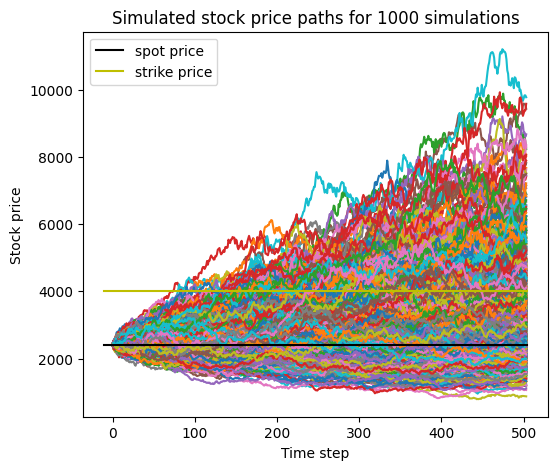

In [39]:
Call_price, Optimal_call_time, Put_price, Optimal_put_time = Black_Scholes_American(S0, K, q, T, r, sigma)

In [40]:
print(f'The value of Call Option = {Call_price:.3f}')
print(f'The optimal time to exercise call option is after {Optimal_call_time} days')
print(f'The value of Put Option = {Put_price:.3f}')
print(f'The optimal time to exercise put option is after {Optimal_put_time} days')
print('The time given is when the market is functioning')

The value of Call Option = 430.425
The optimal time to exercise call option is after 327 days
The value of Put Option = 1953.407
The optimal time to exercise put option is after 162 days
The time given is when the market is functioning


#European Option

In [41]:
S0 = 2418 # current stock price
K = 4000 # strike price
r = 6.938/100 # risk-free rate
q = 0.33/100 # dividend yield
sigma = 18.34/100 # volatility
T = 2 # time to expiration

In [42]:
Call_price, Put_price = Black_Scholes_European(S0, K, q, T, r, sigma)

In [43]:
print(f'The value of Call Option = {Call_price:.3f}')
print(f'The value of Put Option = {Put_price:.3f}')

The value of Call Option = 6.849
The value of Put Option = 1086.503
